In [20]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [21]:
!pip install tensorflow

<b>Import Data from json file</b>
First open and read the file

In [22]:
json_file = open("countries-aggregated_json.json", 'r')

In [23]:
jsondata = json_file.read()

In [24]:
jsondata[:500]

'[{"Confirmed": 0, "Country": "Afghanistan", "Date": "2020-01-22", "Deaths": 0, "Recovered": 0},{"Confirmed": 0, "Country": "Afghanistan", "Date": "2020-01-23", "Deaths": 0, "Recovered": 0},{"Confirmed": 0, "Country": "Afghanistan", "Date": "2020-01-24", "Deaths": 0, "Recovered": 0},{"Confirmed": 0, "Country": "Afghanistan", "Date": "2020-01-25", "Deaths": 0, "Recovered": 0},{"Confirmed": 0, "Country": "Afghanistan", "Date": "2020-01-26", "Deaths": 0, "Recovered": 0},{"Confirmed": 0, "Country": "'

The data is in string format. so we need to parse this data using json library to convert it into json format.

In [25]:
# parse the file that we opened and read, as it is in string format
json_obj = json.loads(jsondata)

In [26]:
print('Number of records :', len(json_obj))

Number of records : 86400


Covid-19 cases details for many countries are present in the dataset.

<b>Extract the details of covid cases of india and store it.</b>  
The records for india is present from index 35550 till 35999.

In [27]:
india_covid_record = json_obj[35550:35999]

In [28]:
date_of_record = []
confirmed = []
deaths = []
recovered = []

for i in range(len(india_covid_record)):
    date_of_record.append(india_covid_record[i]['Date'])
    confirmed.append(india_covid_record[i]['Confirmed'])
    deaths.append(india_covid_record[i]['Deaths'])
    recovered.append(india_covid_record[i]['Recovered'])

In [29]:
df_india = pd.DataFrame({'date_of_record':date_of_record, 'confirmed':confirmed, 'deaths':deaths, 'recovered':recovered})

In [30]:
df_india

,date_of_record,confirmed,deaths,recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
444,2021-04-10,13358805,169275,12081443
445,2021-04-11,13527717,170179,12156529
446,2021-04-12,13689453,171058,12253697
447,2021-04-13,13873825,172085,12336036


In [31]:
df_india.describe()

,confirmed,deaths,recovered
count,4.490000e+02,449.000000,4.490000e+02
mean,5.028102e+06,74691.612472,4.620825e+06
std,4.756932e+06,65754.522768,4.574520e+06
min,0.000000e+00,0.000000,0.000000e+00
25%,7.805500e+04,2551.000000,2.640000e+04
50%,3.853406e+06,67376.000000,2.970492e+06
75%,1.012378e+07,146756.000000,9.693173e+06
max,1.407456e+07,173123.000000,1.242956e+07


<b> Check for missing values</b>

In [32]:
df_india.isnull().sum()

date_of_record    0
confirmed         0
deaths            0
recovered         0
dtype: int64

No missing values present, Thus we can continue.

<b> Find Daily Active cases</b>

In [33]:
df_india['active_cases'] = df_india.confirmed-df_india.recovered

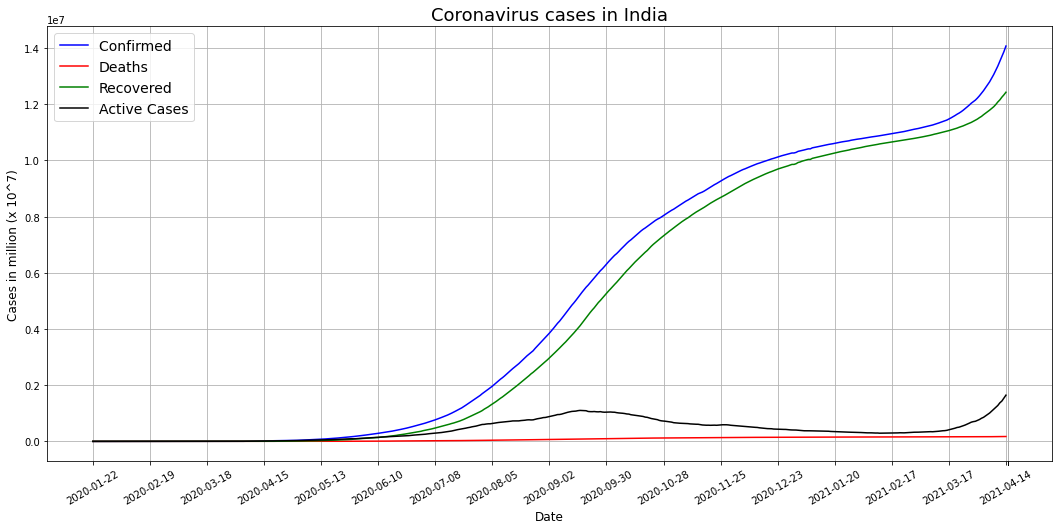

In [34]:
plt.figure(figsize=(18,8))
plt.plot(df_india.date_of_record,df_india.confirmed, color = 'blue', label = 'Confirmed ')
plt.plot(df_india.date_of_record,df_india.deaths, color = 'red', label = 'Deaths')
plt.plot(df_india.date_of_record,df_india.recovered, color = 'green', label = 'Recovered')
plt.plot(df_india.date_of_record,df_india.active_cases, color = 'black', label = 'Active Cases')

plt.title('Coronavirus cases in India', fontsize = 18)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Cases in million (x 10^7)', fontsize = 12)

# only print every 28 x-ticks as there are around 450 xticks which will over crowd the x axis 
plt.xticks([df_india.date_of_record[i] if (i%28 == 0) else '' for i in range(len(df_india.date_of_record)) ])
plt.xticks(rotation = 30)
plt.legend(fontsize = 14)
plt.grid()
plt.show()

The above plots shows the Confirmed, Recovered, Active & Deaths due to corona virus. The graph shows that in april 2021 there is a sudden spike in the number of cases due to second wave.

<b>Active Cases</b>

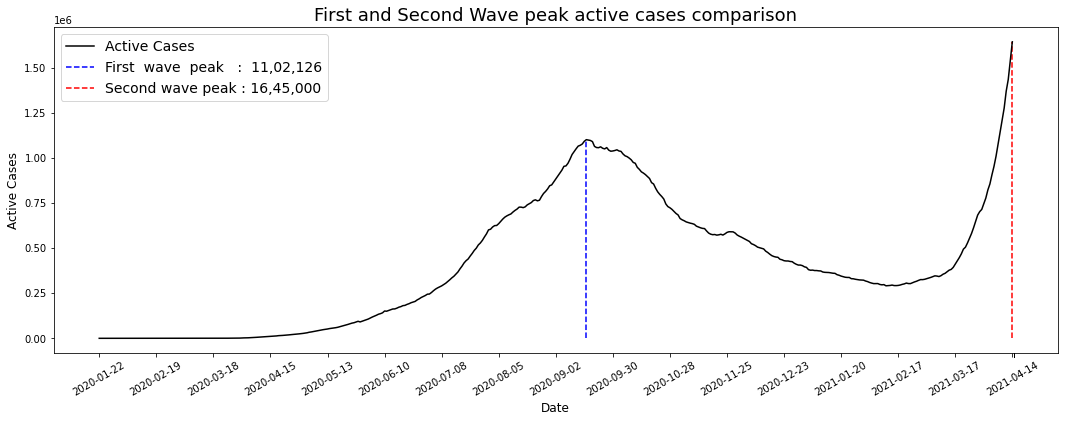

In [35]:
plt.figure(figsize=(18,6))
plt.plot(df_india.date_of_record,df_india.confirmed-df_india.recovered, color = 'black', label = 'Active Cases')
plt.xticks([df_india.date_of_record[i] if (i%28 == 0) else '' for i in range(len(df_india.date_of_record)) ])
plt.xticks(rotation = 30) 

plt.title('First and Second Wave peak active cases comparison', fontsize = 18)
plt.xlabel('Date',fontsize = 12)
plt.ylabel('Active Cases', fontsize = 12)

# Find the peak active case during the First wave and plot a vertical line for it
# the first wave ended within 400 days, so find the peak of first wave withing 400 range
plt.vlines(((df_india.active_cases)[:400]).idxmax(),0,((df_india.active_cases)[:400]).max(),
           color='blue',label='First  wave  peak   :  11,02,126',linestyles='dashed')

# Find the peak active case during the First wave and plot a vertical line for it
# Take entire data to find the peak for second wave, so there is no need to define intervals
plt.vlines(((df_india.active_cases)).idxmax(),0,((df_india.active_cases)).max(),color='red',
           label='Second wave peak : 16,45,000',linestyles='dashed')
plt.legend(fontsize = 14)
plt.show()

This plot clearly shows the comparison between first wave & second wave . The peak active cases of second wave is already more than 1.5 time of the peak active case observed during the first wave.

<b>Fatality rate over time</b>

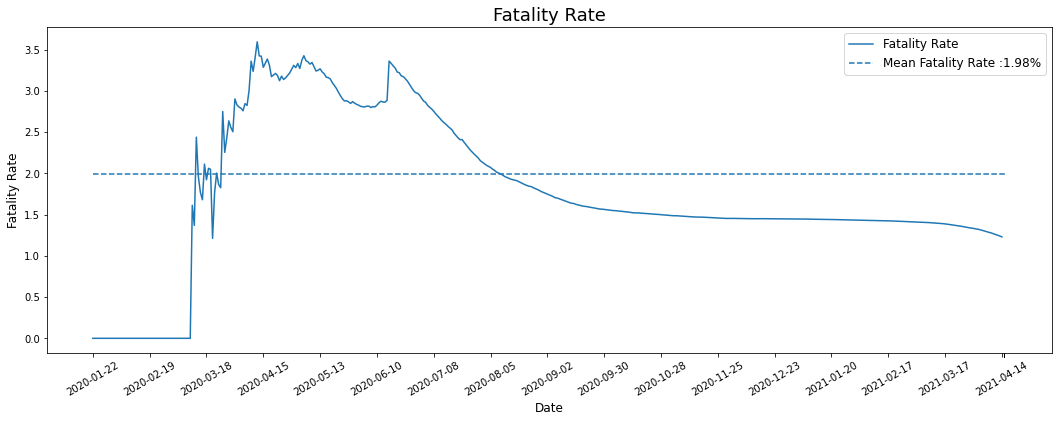

In [36]:
plt.figure(figsize = (18,6))

fatality_rate = ((df_india.deaths/df_india.confirmed)).fillna(0)*100
plt.plot(df_india.date_of_record,fatality_rate, label = 'Fatality Rate')

plt.title('Fatality Rate', fontsize = 18)
plt.xlabel('Date',fontsize = 12)
plt.ylabel('Fatality Rate', fontsize = 12)

plt.xticks([df_india.date_of_record[i] if (i%28 == 0) else '' for i in range(len(df_india.date_of_record)) ])
plt.xticks(rotation = 30) # rotate the x axis ticks by 30 degree

# Mean of Fatality rate since first death
mean_fatality_rate = round(fatality_rate[49:].mean(),3)

# plot a horizontal line for mean fatality rate
plt.hlines(mean_fatality_rate,0,450,label='Mean Fatality Rate :1.98%',linestyles='dashed')

plt.legend(fontsize = 12)
plt.show()

The overall fatality rate is around 1.98% and it seems to be declining. (Initially it was 0 because of no covid related deaths.)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [38]:


def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [39]:

import numpy as np
timeseries_data = df_india.confirmed[:-10].values

# choose a number of time steps : means we will use previous 3 records to make prediction of next 1 value
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [40]:
print('our initial data : ',timeseries_data,'\n')

print('Initial data transformed :')
print('Inputs\n',X)
print('Target',y)
print(X.shape)
print(y.shape)

our initial data :  [       0        0        0        0        0        0        0        0
        1        1        1        2        3        3        3        3
        3        3        3        3        3        3        3        3
        3        3        3        3        3        3        3        3
        3        3        3        3        3        3        3        3
        5        5       28       30       31       34       39       43
       56       62       73       82      102      113      119      142
      156      194      244      330      396      499      536      657
      727      887      987     1024     1251     1397     1998     2543
     2567     3082     3588     4778     5311     5916     6725     7598
     8446     9205    10453    11487    12322    13430    14352    15722
    17615    18539    20080    21370    23077    24530    26283    27890
    29451    31324    33062    34863    37257    39699    42505    46437
    49400    52987    56351    

In [41]:
print('Size of training data',(X.shape))

Size of training data (436, 3)


In [42]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [43]:
print(X)
print(type(X))
print(type(y))

[[[       0]
  [       0]
  [       0]]

 [[       0]
  [       0]
  [       0]]

 [[       0]
  [       0]
  [       0]]

 ...

 [[12149335]
  [12221665]
  [12303131]]

 [[12221665]
  [12303131]
  [12392260]]

 [[12303131]
  [12392260]
  [12485509]]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(128,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 7ms/step - loss: 42248146255872.0000
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 29344722321408.0000
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 2510207320064.0000
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 1479097057280.0000
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 7690231218176.0000
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 2268206727168.0000
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 1779259277312.0000
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 333910999040.0000
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 39862616064.0000
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 25376266240.0000
Epoch 11/100
14/14 [==============================] - 0s 6ms/step - loss: 79572684

14/14 [==============================] - 0s 6ms/step - loss: 5294957056.0000
Epoch 92/100
14/14 [==============================] - 0s 6ms/step - loss: 5010618368.0000
Epoch 93/100
14/14 [==============================] - 0s 6ms/step - loss: 5099905024.0000
Epoch 94/100
14/14 [==============================] - 0s 6ms/step - loss: 5087639552.0000
Epoch 95/100
14/14 [==============================] - 0s 7ms/step - loss: 5260999680.0000
Epoch 96/100
14/14 [==============================] - 0s 7ms/step - loss: 5497725440.0000
Epoch 97/100
14/14 [==============================] - 0s 7ms/step - loss: 5345450496.0000
Epoch 98/100
14/14 [==============================] - 0s 6ms/step - loss: 5199964672.0000
Epoch 99/100
14/14 [==============================] - 0s 6ms/step - loss: 5387196416.0000
Epoch 100/100
14/14 [==============================] - 0s 6ms/step - loss: 5580203008.0000


<b>Make Predictions</b>

In [45]:
# demonstrate prediction for next 10 days
x_input = np.array(df_india.confirmed[-3:].values)

temp_input=list(x_input)


lst_output=[]
i=0
while(i<50):
    if(len(temp_input)>3):
        
        x_input=np.array(temp_input[1:])
        print("Input for Day {}  : {}".format(i,x_input))
        
        x_input = x_input.reshape((1, n_steps, n_features))
        
        yhat = model.predict(x_input, verbose=0)
        print("Output for Day {} : {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print('Forecast for next 10 Days',lst_output)

Input for Day 1  : [13873825. 14074564. 13870204.]
Output for Day 1 : [[14021012.]]
Input for Day 2  : [14074564. 13870204. 14021012.]
Output for Day 2 : [[14054262.]]
Input for Day 3  : [13870204. 14021012. 14054262.]
Output for Day 3 : [[14017073.]]
Input for Day 4  : [14021012. 14054262. 14017073.]
Output for Day 4 : [[14101406.]]
Input for Day 5  : [14054262. 14017073. 14101406.]
Output for Day 5 : [[14111834.]]
Input for Day 6  : [14017073. 14101406. 14111834.]
Output for Day 6 : [[14128444.]]
Input for Day 7  : [14101406. 14111834. 14128444.]
Output for Day 7 : [[14176265.]]
Input for Day 8  : [14111834. 14128444. 14176265.]
Output for Day 8 : [[14193180.]]
Input for Day 9  : [14128444. 14176265. 14193180.]
Output for Day 9 : [[14222475.]]
Input for Day 10  : [14176265. 14193180. 14222475.]
Output for Day 10 : [[14256122.]]
Input for Day 11  : [14193180. 14222475. 14256122.]
Output for Day 11 : [[14279870.]]
Input for Day 12  : [14222475. 14256122. 14279870.]
Output for Day 12 : 

<b>Lets plot graph for time series forecasting</b>

In [46]:
# prepare x coordinates
day_till_now=np.arange(0,449)
day_pred=np.arange(449,499)

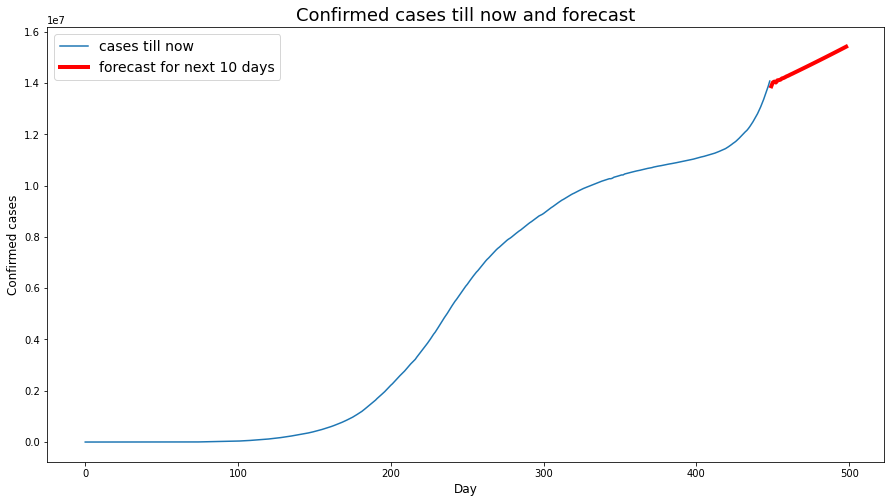

In [49]:
plt.figure(figsize=(15,8))
plt.plot(day_till_now,df_india.confirmed, label = 'cases till now')
plt.plot(day_pred,lst_output, color = 'red', label = 'forecast for next 10 days', lw = 4)
plt.legend(fontsize = 14)
plt.title('Confirmed cases till now and forecast', fontsize = 18)
plt.xlabel('Day' ,fontsize = 12)
plt.ylabel('Confirmed cases' ,fontsize = 12)
plt.show()

The Forecast of confirmed cases for next 10 days( red line )